In [1]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#cpu - gpu configuration
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [3]:
#variables
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 250
epochs = 110

In [4]:
with open("fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [5]:
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

In [6]:
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("",end="")

In [7]:
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [8]:
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

W0714 11:00:03.290125 14416 deprecation_wrapper.py:119] From D:\New folder\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 11:00:03.294448 14416 deprecation_wrapper.py:119] From D:\New folder\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 11:00:03.299210 14416 deprecation_wrapper.py:119] From D:\New folder\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0714 11:00:03.367763 14416 deprecation_wrapper.py:119] From D:\New folder\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0714 11:00:03.466827 14416 deprecation_wrapper.py:119] From D:\New folder\lib\site-packages\keras\backend\tensorflow_backe

In [9]:
#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

W0713 14:46:14.298072 18336 deprecation_wrapper.py:119] From D:\New folder\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0713 14:46:14.310042 18336 deprecation.py:506] From D:\New folder\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#------------------------------

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
# use in case of onehotncoding [1,0,0;0,1,0;0,0,1] 
# Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order 
# and second-order moments, the method is "computationally efficient, has little memory requirement 

W0713 14:46:14.572956 18336 deprecation_wrapper.py:119] From D:\New folder\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 14:46:14.592955 18336 deprecation_wrapper.py:119] From D:\New folder\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
fit = True

if fit == True:
        #model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
        model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
else:
        model.load_weights('/data/facial_expression_model_weights.h5') #load weights

W0713 14:46:14.929381 18336 deprecation.py:323] From D:\New folder\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/110
250/250 [==============================] - 278s 1s/step - loss: 1.7736 - acc: 0.2662
Epoch 2/110
250/250 [==============================] - 276s 1s/step - loss: 1.5428 - acc: 0.3903
Epoch 3/110
250/250 [==============================] - 274s 1s/step - loss: 1.3531 - acc: 0.4778
Epoch 4/110
250/250 [==============================] - 268s 1s/step - loss: 1.2436 - acc: 0.5281
Epoch 5/110
250/250 [==============================] - 271s 1s/step - loss: 1.1737 - acc: 0.5553
Epoch 6/110
250/250 [==============================] - 268s 1s/step - loss: 1.1041 - acc: 0.5835
Epoch 7/110
250/250 [==============================] - 268s 1s/step - loss: 1.0433 - acc: 0.6055
Epoch 8/110
250/250 [==============================] - 268s 1s/step - loss: 0.9859 - acc: 0.6302
Epoch 9/110
250/250 [==============================] - 268s 1s/step - loss: 0.9212 - acc: 0.6544
Epoch 10/110
250/250 [==============================] - 269s 1s/step - loss: 0.8547 - acc: 0.6805
Epoch 11/110
250/250 [=======

In [12]:
#overall evaluation
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])

3589/3589 [==============================] - 4s 1ms/step
Test loss: 3.6952353651791303
Test accuracy: 57.731958763716975


In [13]:
# for drawing bar graph for emotion preditions
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [14]:
monitor_testset_results = False

if monitor_testset_results == True:
        #make predictions for test set
        predictions = model.predict(x_test)

        index = 0
        for i in predictions:
            if index < 30 and index >= 20:
                #print(i) #predicted scores
                #print(y_test[index]) #actual scores

                testing_img = np.array(x_test[index], 'float32')
                testing_img = testing_img.reshape([48, 48]);

                plt.gray()
                plt.imshow(testing_img)
                plt.show()

                print(i)

                emotion_analysis(i)
                print("----------------------------------------------")
            index = index + 1

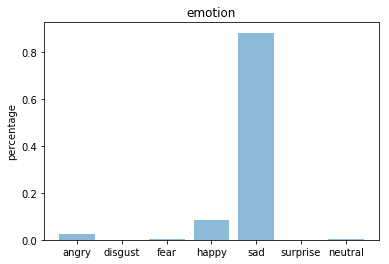

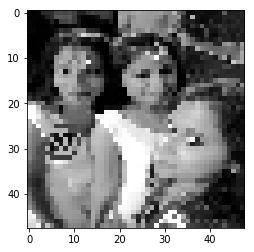

In [22]:
#make prediction for custom image out of test set

img = image.load_img("C:\\Users\\Dell\\Desktop\\training\\picture.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()